In [3]:
!pip install pandas numpy matplotlib scikit-learn seaborn



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


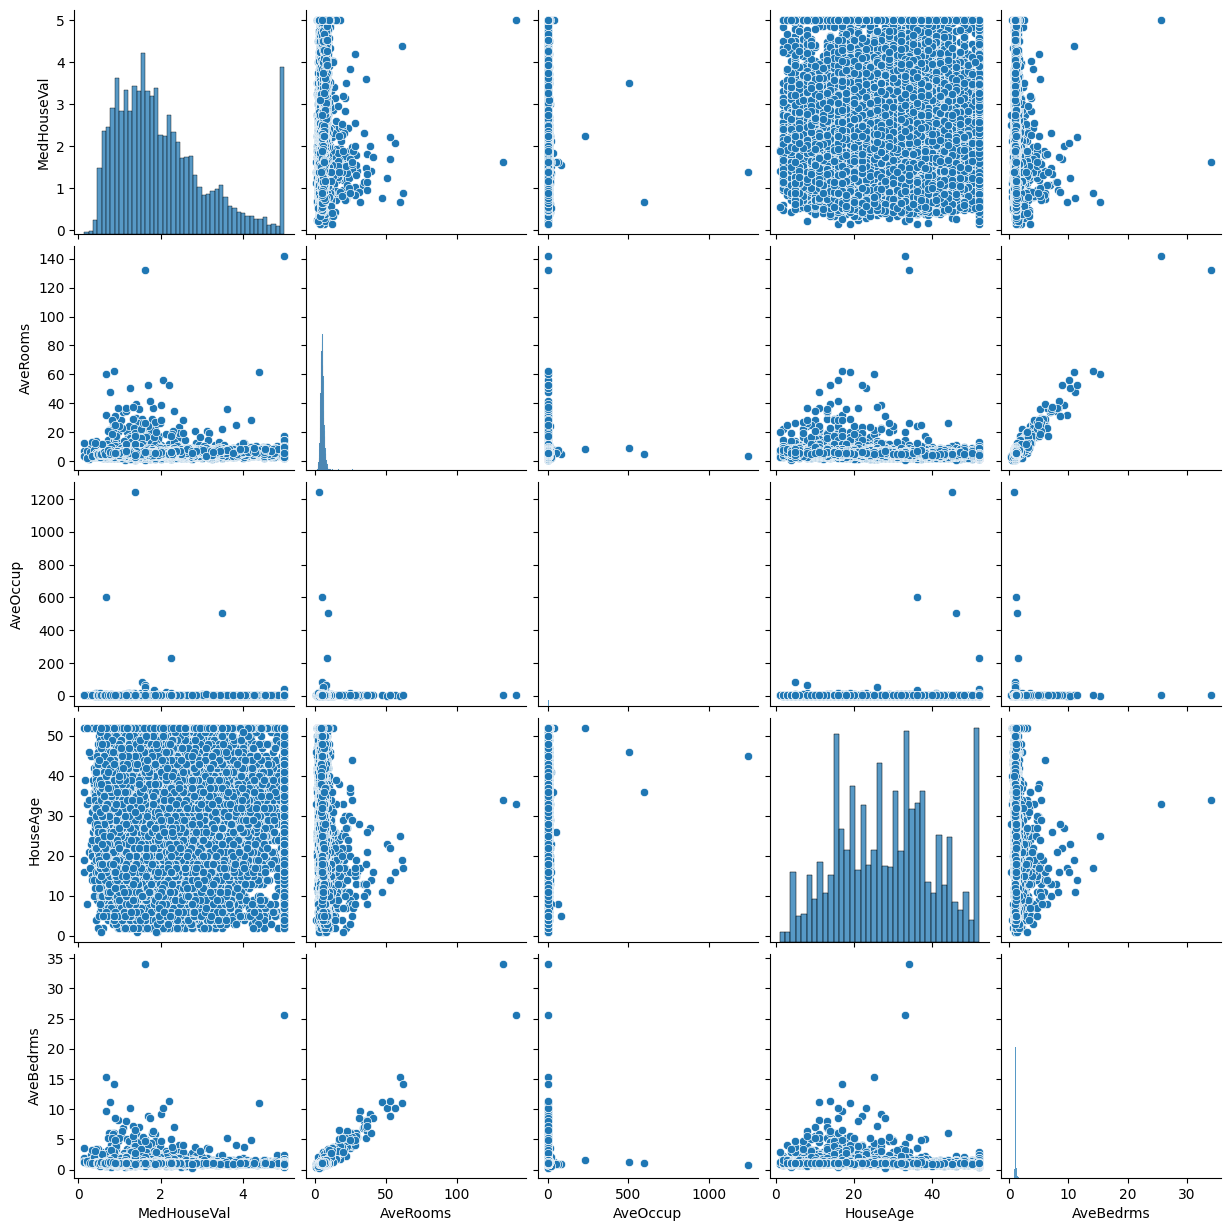

Mean Squared Error: 1.1281459904120177
R^2 Score: 0.1390886287070109
           Coefficient
AveRooms      0.347255
AveOccup     -0.002496
HouseAge      0.014997
AveBedrms    -1.699206


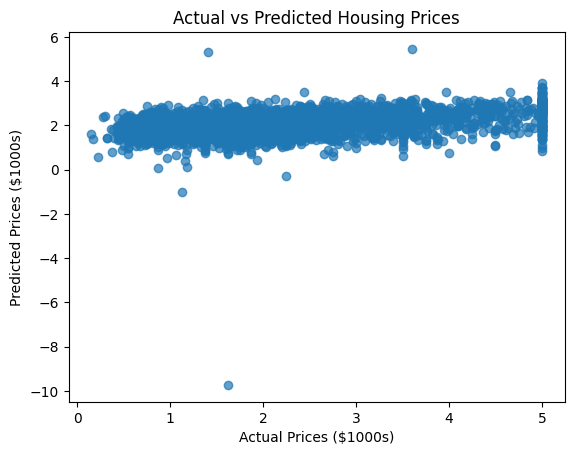

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Display the first few rows
print(df.head())

# Data Exploration and Visualization
sns.pairplot(df[['MedHouseVal', 'AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']])
plt.show()

# Splitting data into features and target
X = df[['AveRooms', 'AveOccup', 'HouseAge', 'AveBedrms']]  # Selecting a few features for simplicity
y = df['MedHouseVal']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Model Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Housing Prices")
plt.show()
